In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from time import sleep
import sys
import MeCab
import numpy as np
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
import configparser

In [2]:
config = configparser.ConfigParser()
config.read('setting.ini')
section = 'file_paths'
MASK_TELE = config.get(section, 'MASK_TELE')
FONT = config.get(section, 'FONT')
NEOLOGD = config.get(section, 'NEOLOGD')

In [3]:
def scraping_web_page(url):
    sleep(1)
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser')
    return soup

In [4]:
#曲一覧ページをスクレイピングする
soup = scraping_web_page('https://www.uta-net.com/artist/7840/')
#htmlをパースして曲名、各曲URL、アーティスト名、作詞、作曲者名を取得する
contents = []
contents.append(soup.find_all(href=re.compile('/song/\d+/$')))
contents.append(soup.find_all(href=re.compile('/song/\d+/$')))
contents.append(soup.find_all(class_=re.compile('td2')))
contents.append(soup.find_all(class_=re.compile('td3')))
contents.append(soup.find_all(class_=re.compile('td4')))
infomations = []
for i, content in enumerate(contents):
    tmp_list = []
    for element in content:
        if i == 0:
            tmp_list.append(element.get('href'))
        else:
            tmp_list.append(element.string)
    infomations.append(tmp_list)
#DataFrameにする
artist_df = pd.DataFrame({
    'URL' : infomations[0],
    'SongName' : infomations[1],
    'Artist' : infomations[2],
    'Lyricist' : infomations[3],
    'Composer' : infomations[4]})
#URLにホストネームを付加
artist_df.URL = artist_df.URL.apply(lambda x : 'https://www.uta-net.com' + x)

In [5]:
artist_df.head()

,Artist,Composer,Lyricist,SongName,URL
0,凛として時雨,TK,TK,Ultra Overcorrection,https://www.uta-net.com/song/243822/
1,凛として時雨,TK,TK,Chocolate Passion,https://www.uta-net.com/song/243821/
2,凛として時雨,TK,TK,Tornado Minority,https://www.uta-net.com/song/243820/
3,凛として時雨,TK,TK,Who's WhoFO,https://www.uta-net.com/song/243819/
4,凛として時雨,TK,TK,EneMe,https://www.uta-net.com/song/243818/


In [6]:
#各曲のページをスクレイピングする
contents_list = []
for i, url in artist_df.URL.iteritems():
    contents_list.append(scraping_web_page(url))

In [7]:
#歌詞、発売日、商品番号をdataframeに格納する
lyrics = []
sales_dates = []
cd_nums = []
for contents in contents_list:
    lyrics.append(contents.find(id='kashi_area').text)
    sales_dates.append(contents.find(id='view_amazon').text[4:14])
    cd_nums.append(contents.find(id='view_amazon').text[19:28])
artist_df['Lyric'] = lyrics
artist_df['Sales_Date'] = sales_dates
artist_df['CD_Number'] = cd_nums 

In [8]:
artist_df

,Artist,Composer,Lyricist,SongName,URL,Lyric,Sales_Date,CD_Number
0,凛として時雨,TK,TK,Ultra Overcorrection,https://www.uta-net.com/song/243822/,醜さにマスカラして 愚かさにサングラスして Caluculatingはぐらかして 煙に巻いて...,2018-02-14,AICL-3481
1,凛として時雨,TK,TK,Chocolate Passion,https://www.uta-net.com/song/243821/,チョコレートレーザー妄想既にロックオン甘くって濃厚 密食Theobroma舐め合って 接触 ...,2018-02-14,AICL-3481
2,凛として時雨,TK,TK,Tornado Minority,https://www.uta-net.com/song/243820/,殺さないで 君の魔法を 怖くなって 許さないで言葉が誰かに奪われた 思考は透明 消えていくそ...,2018-02-14,AICL-3481
3,凛として時雨,TK,TK,Who's WhoFO,https://www.uta-net.com/song/243819/,Who Are You Who Are Youトキメイタ 運命が変われそうだ奇跡 奇跡 目撃...,2018-02-14,AICL-3481
4,凛として時雨,TK,TK,EneMe,https://www.uta-net.com/song/243818/,扉を開けてみた ここは自由ですか？空白の未来ポケット 何を詰めようかって生まれ変わるため？す...,2018-02-14,AICL-3481
5,凛として時雨,TK,TK,ten to ten,https://www.uta-net.com/song/243817/,息をしてない心臓を掴みとって止めてしまえば もう感情は吐き出さなくて良い快感のせいさ 運命の...,2018-02-14,AICL-3481
6,凛として時雨,TK,TK,Serial Number Of Turbo,https://www.uta-net.com/song/243816/,例えば壊せない壁がずっとそこにあって少しだけ透けて見える憧れが浮かんでいた夜中の曖昧な風の声...,2018-02-14,AICL-3481
7,凛として時雨,TK,TK,High Energy Vacuum,https://www.uta-net.com/song/243815/,誰かの笑い声が こっちを向いてる気がして至ってノーマルな感情 創り出す毎日さもしかして永遠に...,2018-02-14,AICL-3481
8,凛として時雨,TK,TK,#5,https://www.uta-net.com/song/243814/,かけがえのないものを手に入れたのはいつのことだろう 怖くなったよ戦うこと 何かに負けること ...,2018-02-14,AICL-3481
9,凛として時雨,TK,TK,i not crazy am you are,https://www.uta-net.com/song/180769/,破壊しそうな神経を君に見せたいんだ 記憶に混ざりたい偽者よ 僕を掻き回してよ 君に見せたいん...,2007-08-22,ANTX-1009


In [9]:
cd_num_name_dict = {
    'AICL-3481' : '#5',
    'ANTX-1009' : 'Inspiration is DEAD',
    'AICL-3382' : 'DIE meets HARD',
    'AICL-2174' : 'still a Sigre virgin?',
    'AICL-2014' : 'just A moment',
    'ANTX-1006' : 'Feeling your UFO',
    'ANTX-1002' : '#4',
    'AICL-2804' : 'Best of Tornado',
    'AICL-2451' : 'abnormalize',
    'AICL-2949' : 'es or s',
    'AICL-2761' : 'Enigmatic Feeling',
    'AICL-2526' : "i'm perfect",
    'ANTX-1011' : 'Telecastic fake show',
    'AICL-2795' : 'Who What Who What',
    'AICL-1985' : 'moment A rhythm'
}
artist_df['Album_Name'] = artist_df.CD_Number.apply(lambda x : cd_num_name_dict[x])

In [10]:
artist_df[artist_df.CD_Number == 'AICL-2804']

,Artist,Composer,Lyricist,SongName,URL,Lyric,Sales_Date,CD_Number,Album_Name
16,凛として時雨,TK,TK,鮮やかな殺人 (2015 mix),https://www.uta-net.com/song/177841/,鮮やかなクラクション 君が鳴らしてた殺しかけてた君が笑ってた味気ないガムを噛みながら気取って...,2015-01-14,AICL-2804,Best of Tornado
41,凛として時雨,TK,TK,想像のSecurity (2015 mix),https://www.uta-net.com/song/177842/,曖昧な言葉で 僕を誘惑しているの曖昧なセキュリティ 思い込みのメロディ宇宙に浮いた僕は 君を...,2015-01-14,AICL-2804,Best of Tornado
46,凛として時雨,TK,TK,テレキャスターの真実 (2015 mix),https://www.uta-net.com/song/177840/,狂いながらも嘘をつき続ける人がここにいる鋭い刃物のようなスタンスでここに生きている僕は笑って...,2015-01-14,AICL-2804,Best of Tornado
61,凛として時雨,TK,TK,傍観,https://www.uta-net.com/song/177839/,つまんない記憶ほど 頭に蘇る殺したい記憶ほど 頭を支配するどこかで見た様な風景 どこかで見た...,2015-01-14,AICL-2804,Best of Tornado


In [11]:
artist_df[artist_df.SongName == 'a over die']

,Artist,Composer,Lyricist,SongName,URL,Lyric,Sales_Date,CD_Number,Album_Name
12,凛として時雨,TK,TK,a over die,https://www.uta-net.com/song/180777/,君の自由にもう飽きて 歌う事も無くなって犯罪的な僕と彼の体内に TIME REVOLUTIO...,2009-05-13,AICL-2014,just A moment


In [12]:
artist_df.at[16,'CD_Number'] = 'ANTX-1002'
artist_df.at[16,'Album_Name'] = cd_num_name_dict['ANTX-1002']
artist_df.at[46,'CD_Number'] = 'ANTX-1002'
artist_df.at[46,'Album_Name'] = cd_num_name_dict['ANTX-1002']
artist_df.at[61,'CD_Number'] = 'ANTX-1002'
artist_df.at[61,'Album_Name'] = cd_num_name_dict['ANTX-1002']
artist_df.at[41,'CD_Number'] = 'ANTX-1006'
artist_df.at[41,'Album_Name'] = cd_num_name_dict['ANTX-1006']

In [13]:
artist_df.drop(12,inplace=True)
artist_df.reset_index(drop=True,inplace=True)

In [15]:
def draw_wordcloud(df,col_name_noun,col_name_quant,fig_title,masking,mask_file, font_file):
    word_freq_dict = {}
    stop_words = set(['いる','する','れる','てる','なる','られる','よう','の','いく','ん','せる','いい','ない','ある','しまう','・','さ'])
    for i, v in df.iterrows():
        if v[col_name_noun] not in stop_words:
            word_freq_dict[v[col_name_noun]] = v[col_name_quant]
    from wordcloud import WordCloud
    #text = ' '.join(words)
    if masking:
        tele_mask = np.array(Image.open(mask_file))
    else:
        tele_mask = None
    wordcloud = WordCloud(background_color='white',
                        font_path = font_file,
                          mask=tele_mask,
                          min_font_size=15,
                         max_font_size=200,
                         width=1000,
                         height=1000
                         #min_font_size=4,
                         #max_font_size=150
                         )
    wordcloud.generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=[20,20])
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.title(fig_title,fontsize=25)

In [16]:
def get_word_list(lyric_list, tagger_file):
    #普通のipadicを使うときはこっち
    #m = MeCab.Tagger ("-Ochasen")
    #neologdを使うときはこっち
    m = MeCab.Tagger (tagger_file)
    lines = []
    keitaiso = []
    for text in lyric_list:
        keitaiso = []
        m.parse('')
        ttt = m.parseToNode (re.sub('\u3000',' ',text))
        while ttt:
            #print(ttt.surface,ttt.feature)
            #辞書に形態素を入れていく
            tmp = {}
            tmp['surface'] = ttt.surface
            tmp['base'] = ttt.feature.split(',')[-3] #base
            tmp['pos'] = ttt.feature.split(',')[0] #pos
            tmp['pos1'] = ttt.feature.split(',')[1] #pos1
            #文頭、文末を表すBOS/EOSは省く
            if 'BOS/EOS' not in tmp['pos']:
                keitaiso.append(tmp)
            ttt = ttt.next
        lines.append(keitaiso)
    #baseが存在する場合baseを、そうでない場合surfaceをリストに格納する
    word_list = [] 
    for line in lines:
        for keitaiso in line:
            if (keitaiso['pos'] == '名詞') |\
                (keitaiso['pos'] == '動詞') |\
                (keitaiso['pos'] == '形容詞') :
                if not keitaiso['base'] == '*' :
                    word_list.append(keitaiso['base'])
                else: 
                    word_list.append(keitaiso['surface'])
    
    return word_list

# アルバムごとにTF-IDFする

In [17]:
#アルバム単位で歌詞を結合する
lyrics = np.array( [] )
for cd_number in artist_df.CD_Number.unique():
    album = artist_df[artist_df.CD_Number == cd_number].copy()
    lyrics = np.append(lyrics, ' '.join(get_word_list(album.Lyric.tolist(),NEOLOGD)))

In [18]:
#TF-IDFでベクトル化する
vectorizer = TfidfVectorizer(use_idf=True, token_pattern=u'(?u)\\b\\w+\\b')
vecs = vectorizer.fit_transform(lyrics)
words_vectornumber = {}
for k,v in sorted(vectorizer.vocabulary_.items(), key=lambda x:x[1]):
    words_vectornumber[v] = k

In [19]:
#各アルバムの各単語のスコアリングをDataFrameにする
vecs_array = vecs.toarray()
albums = []
for vec in vecs_array:
    words_album = []
    vector_album = []
    for i in vec.nonzero()[0]:
        words_album.append(words_vectornumber[i])
        vector_album.append(vec[i])
    albums.append(pd.DataFrame({
        'words' : words_album,
        'vector' : vector_album
    }))

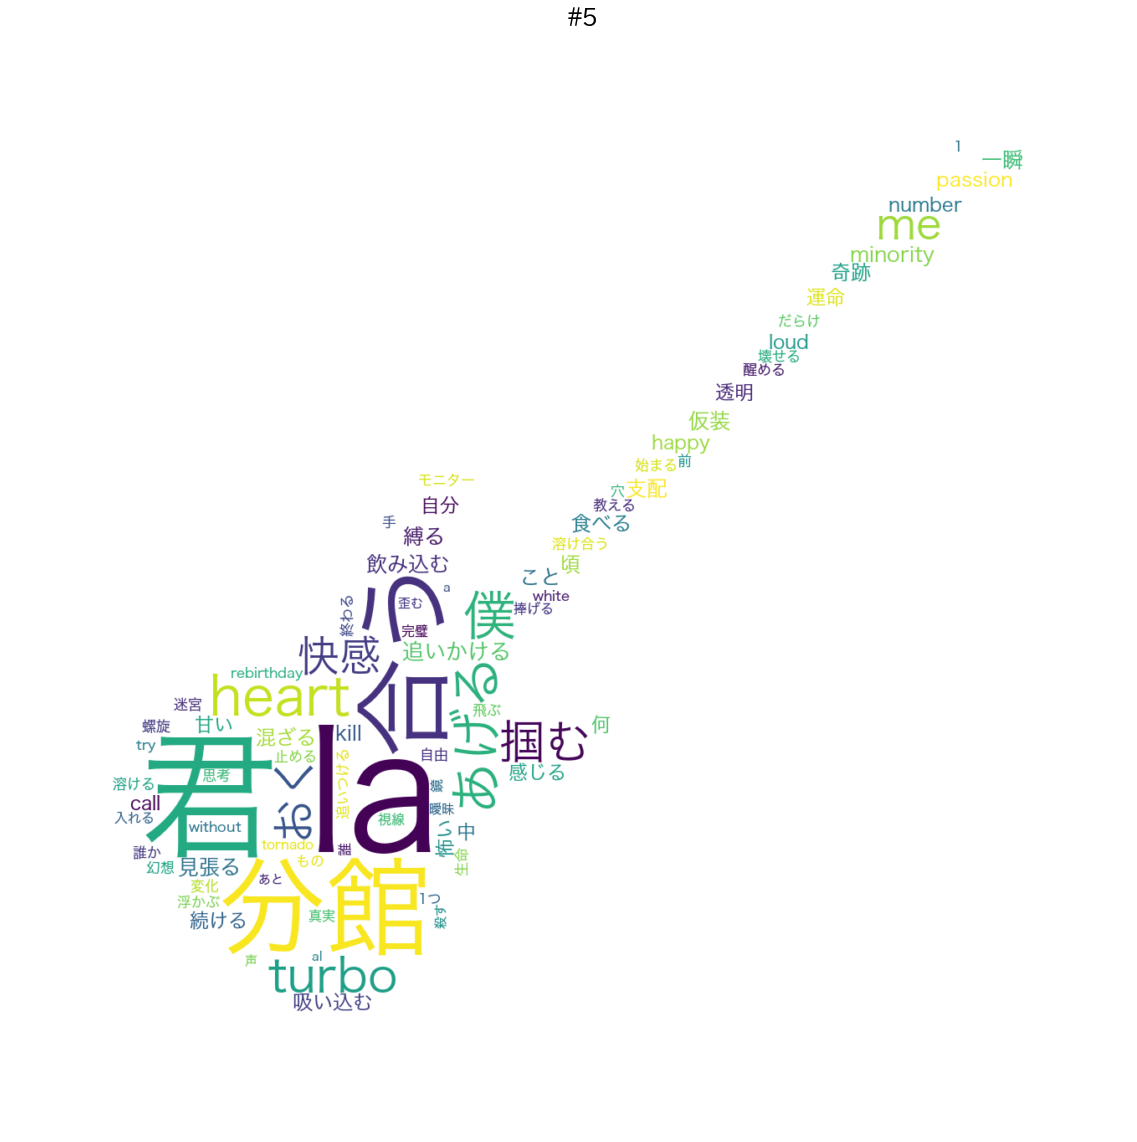

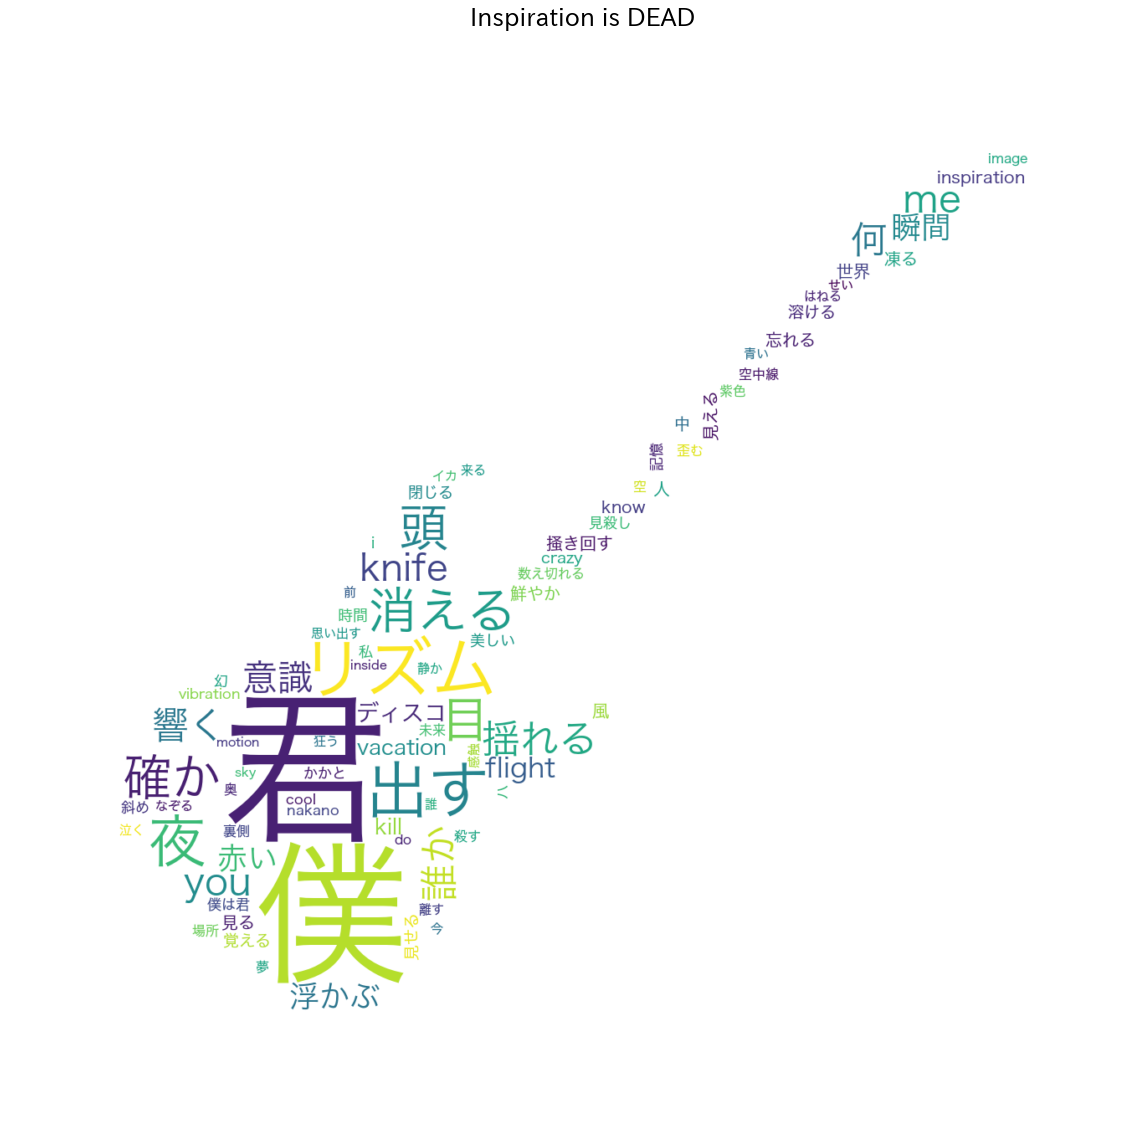

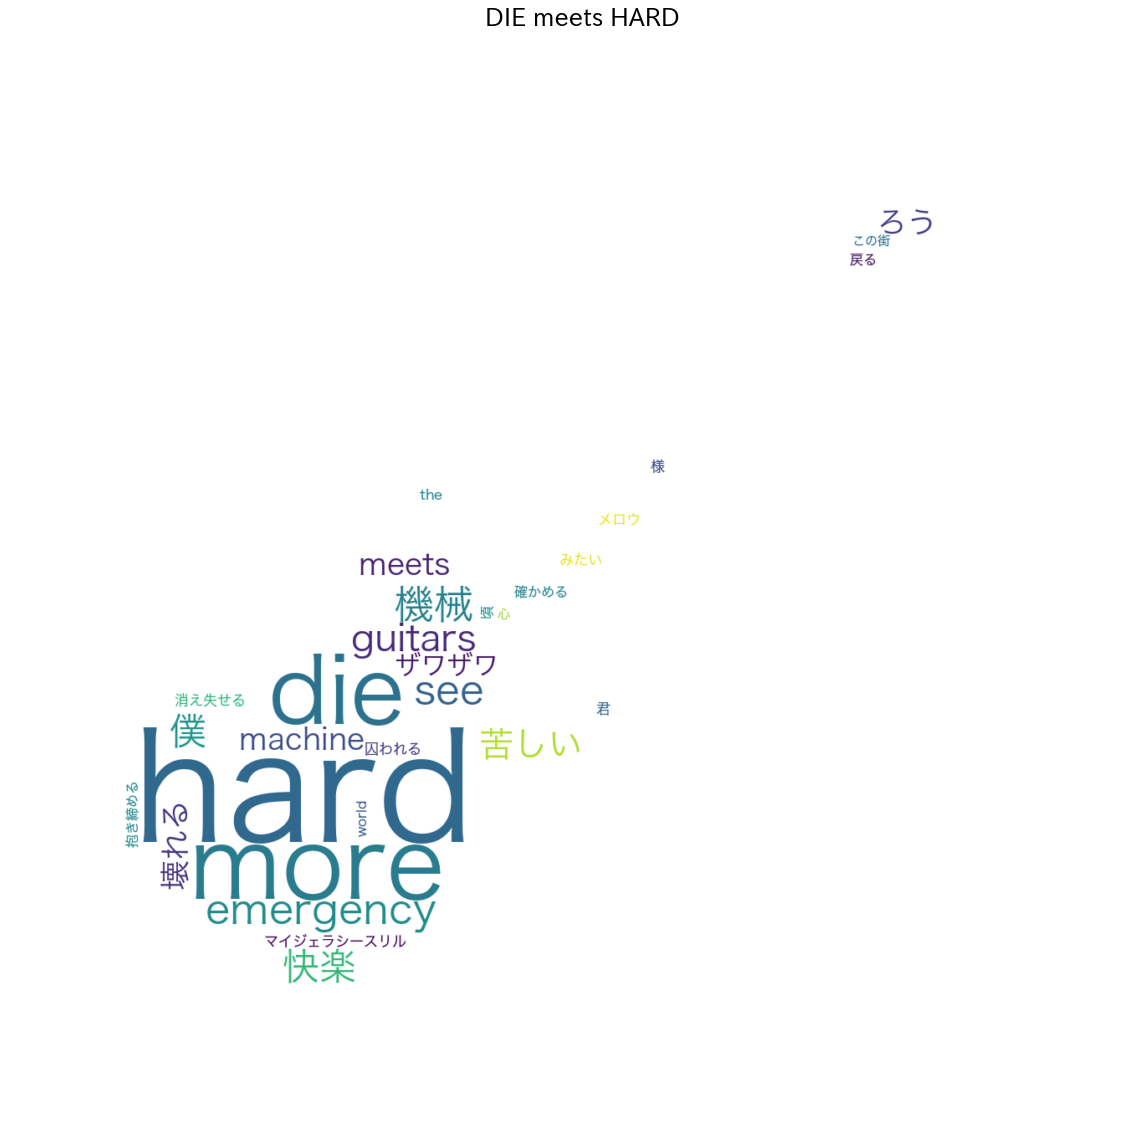

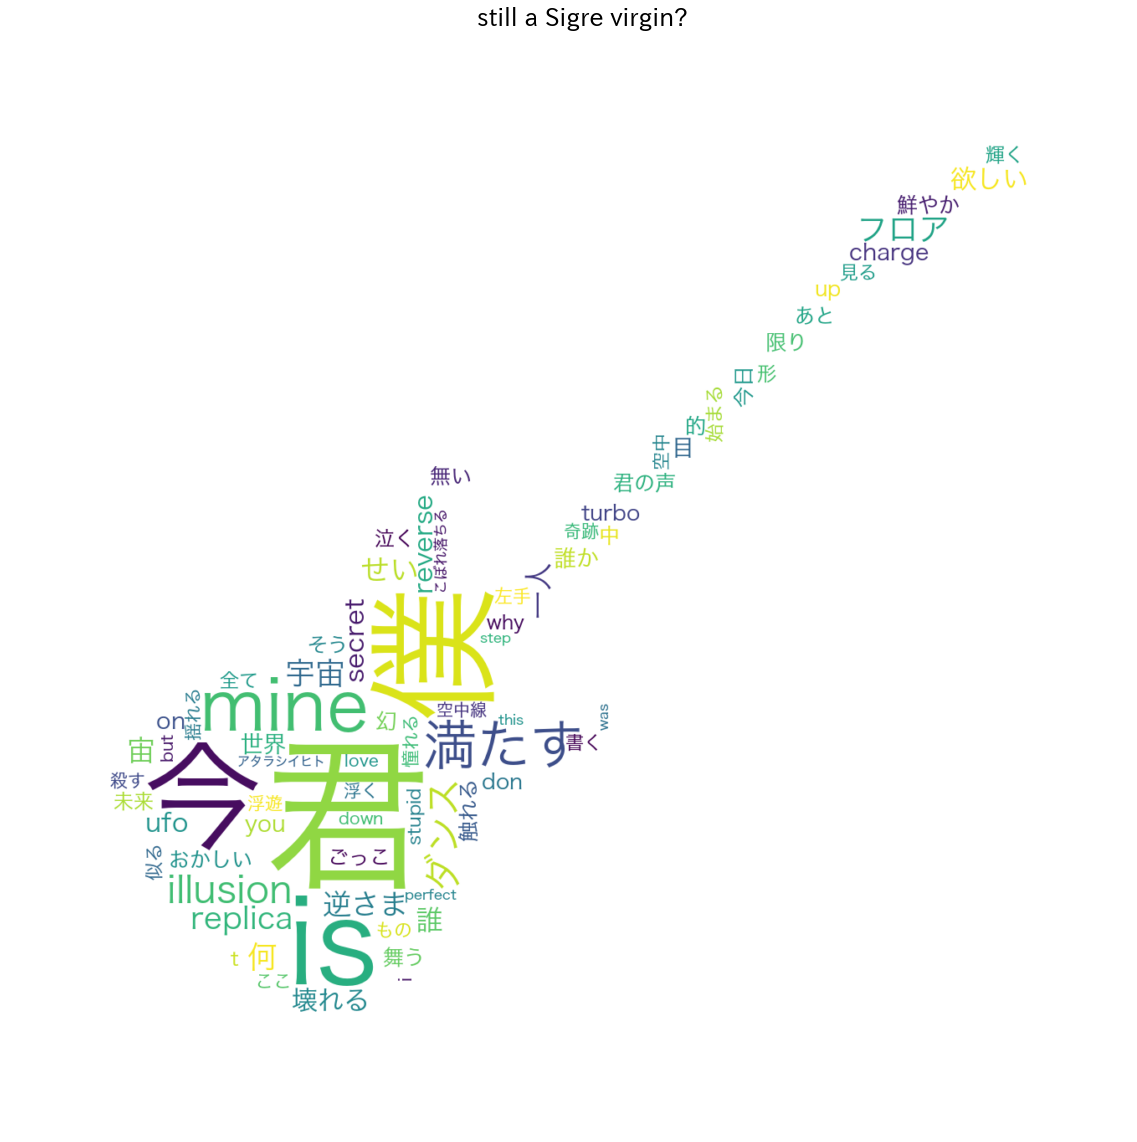

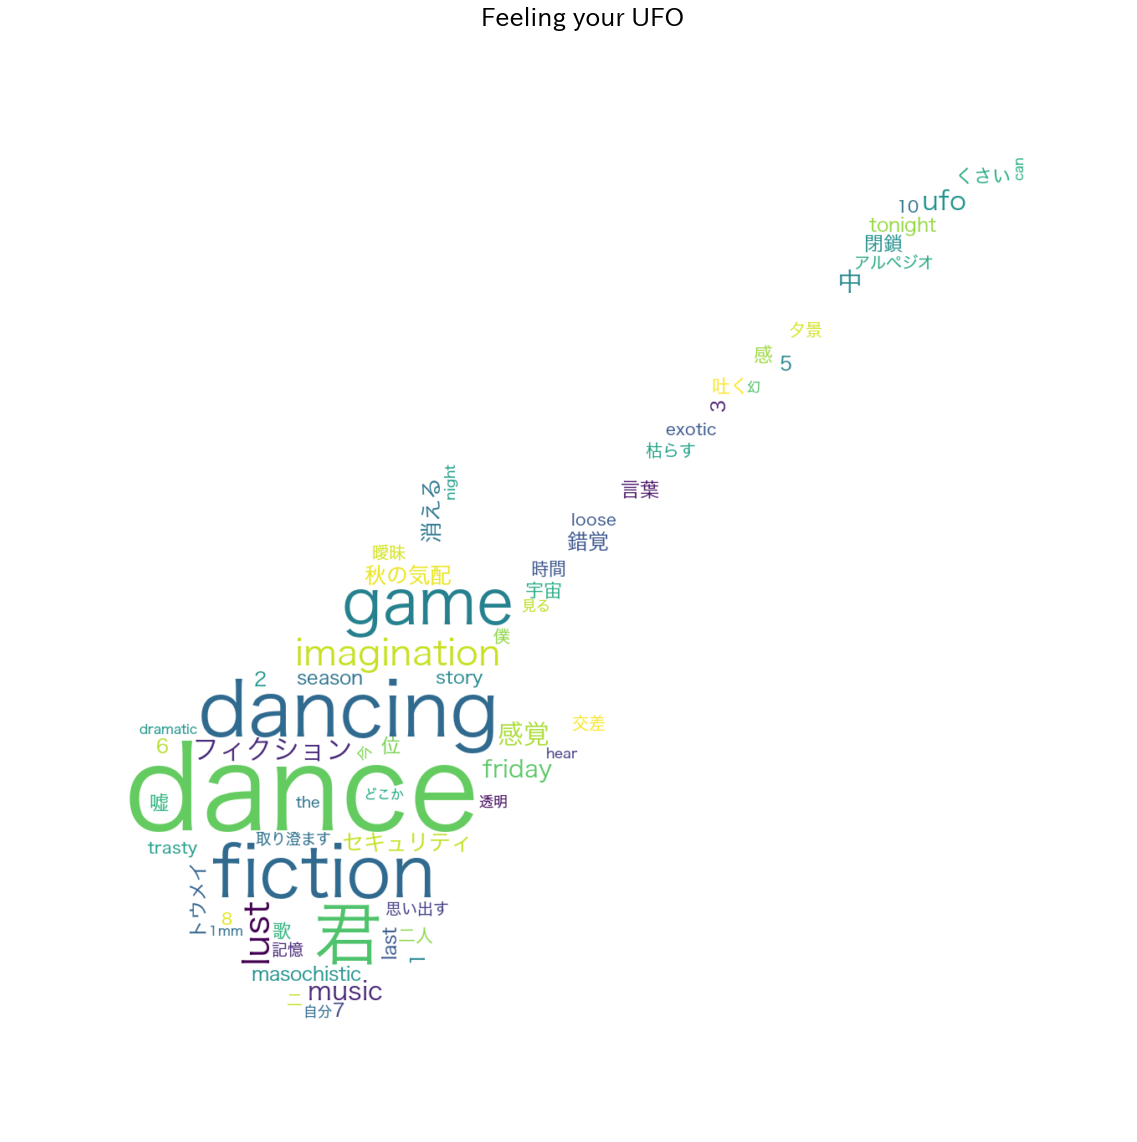

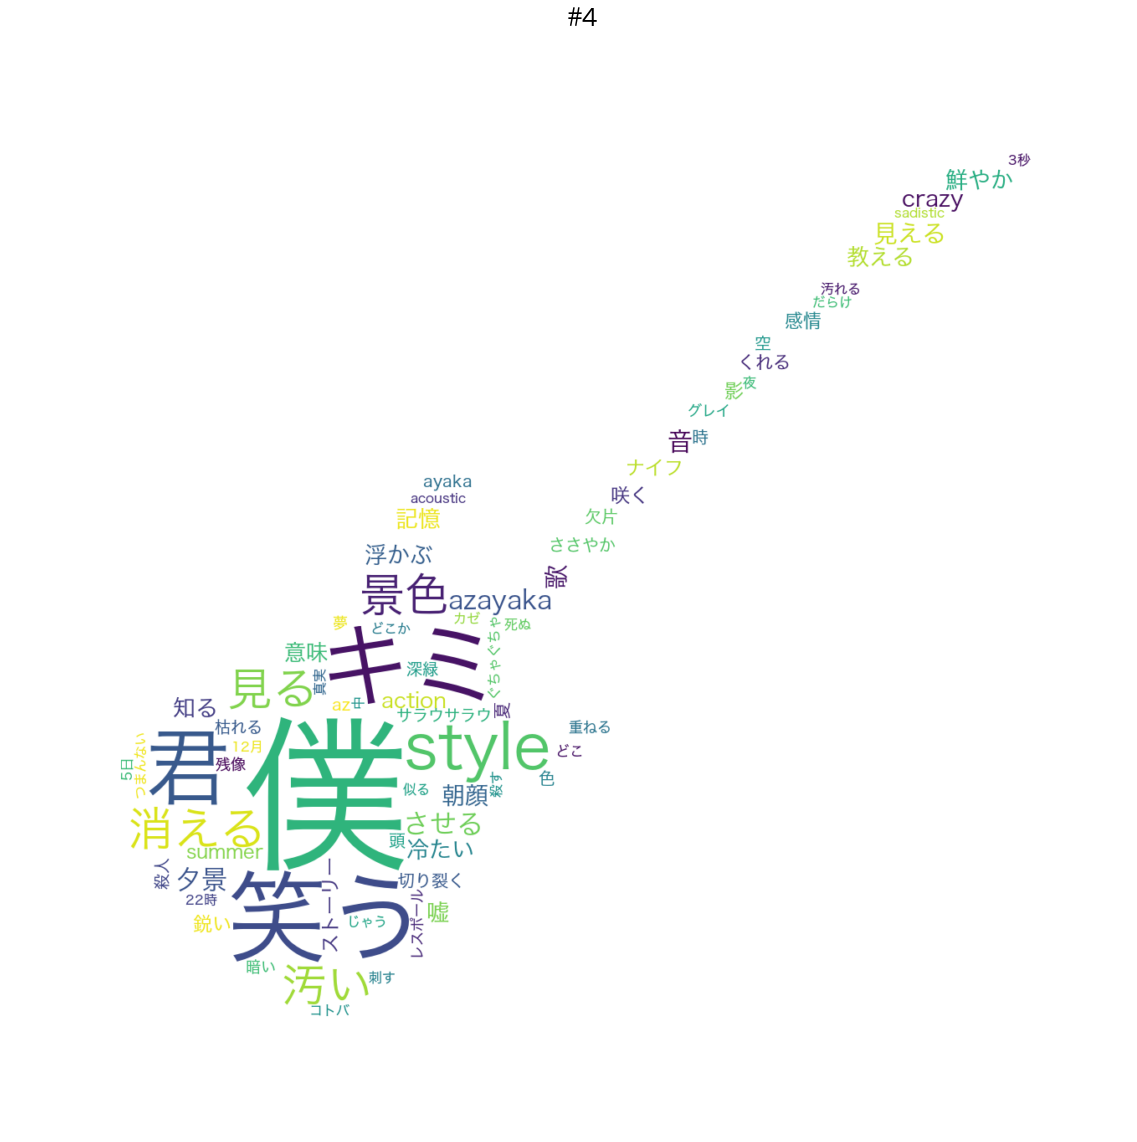

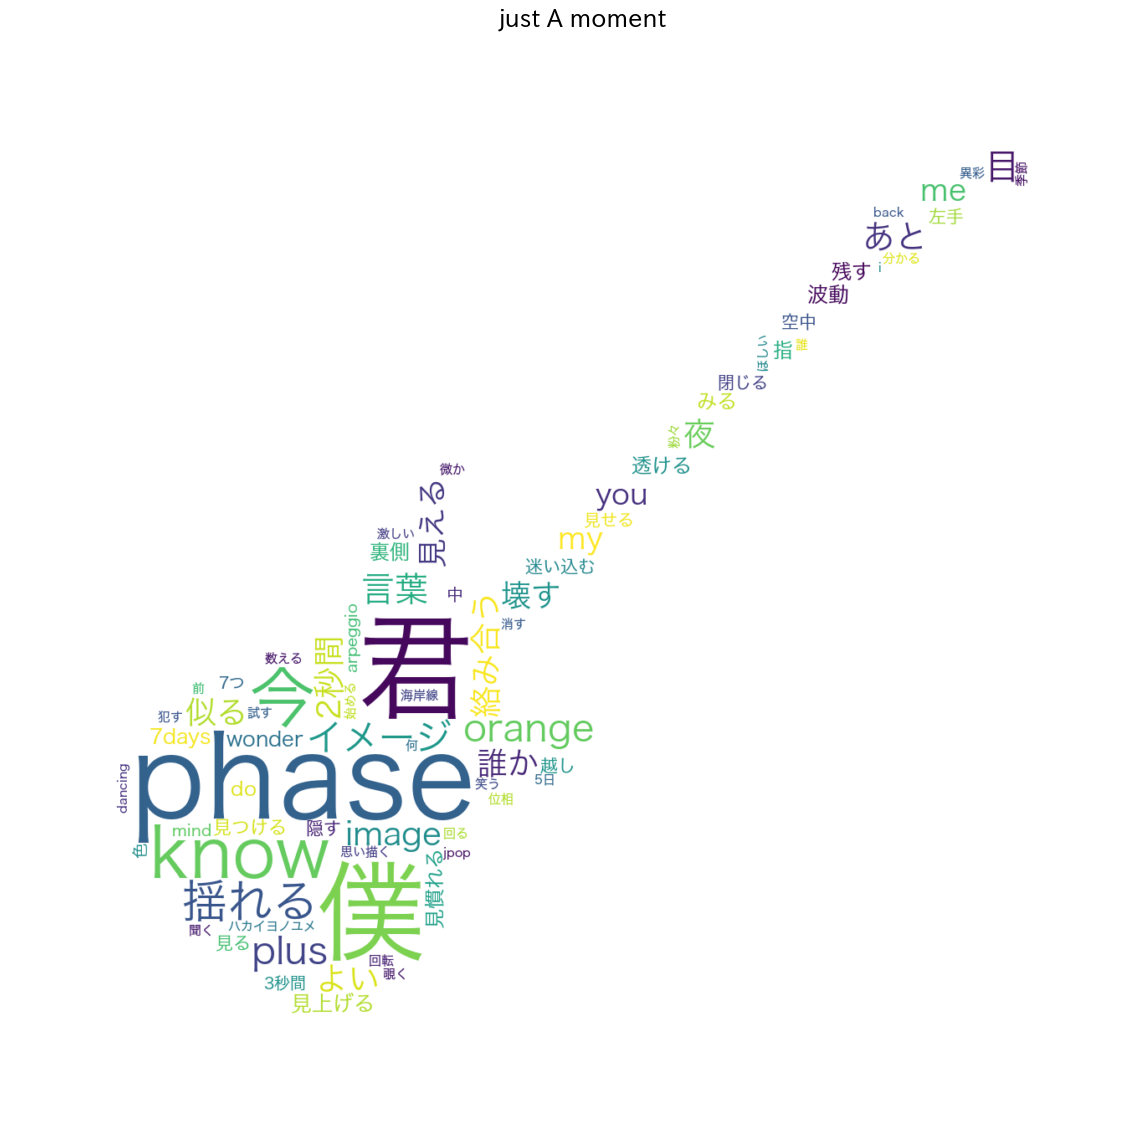

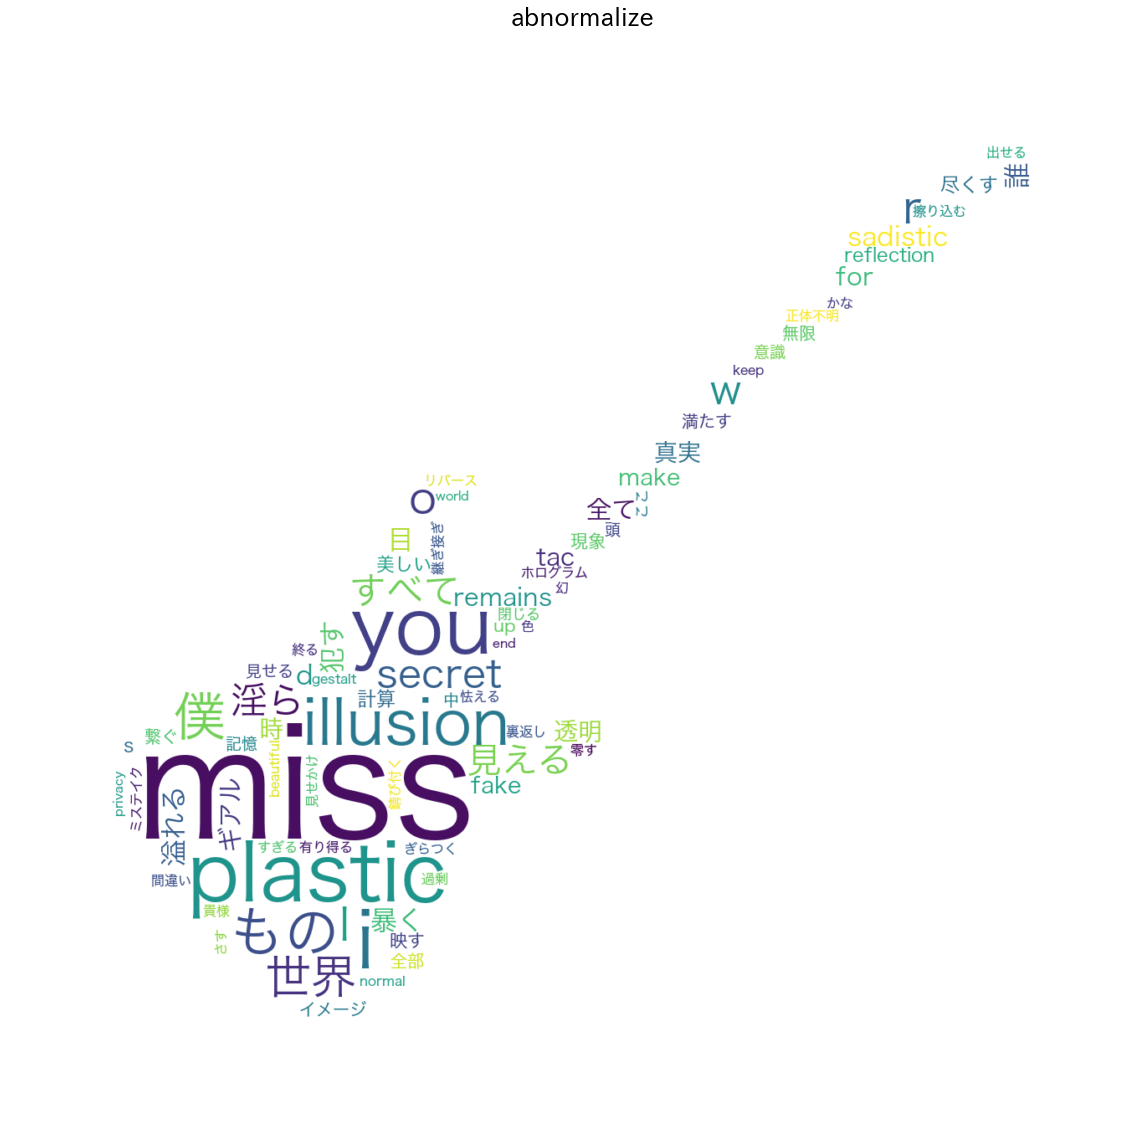

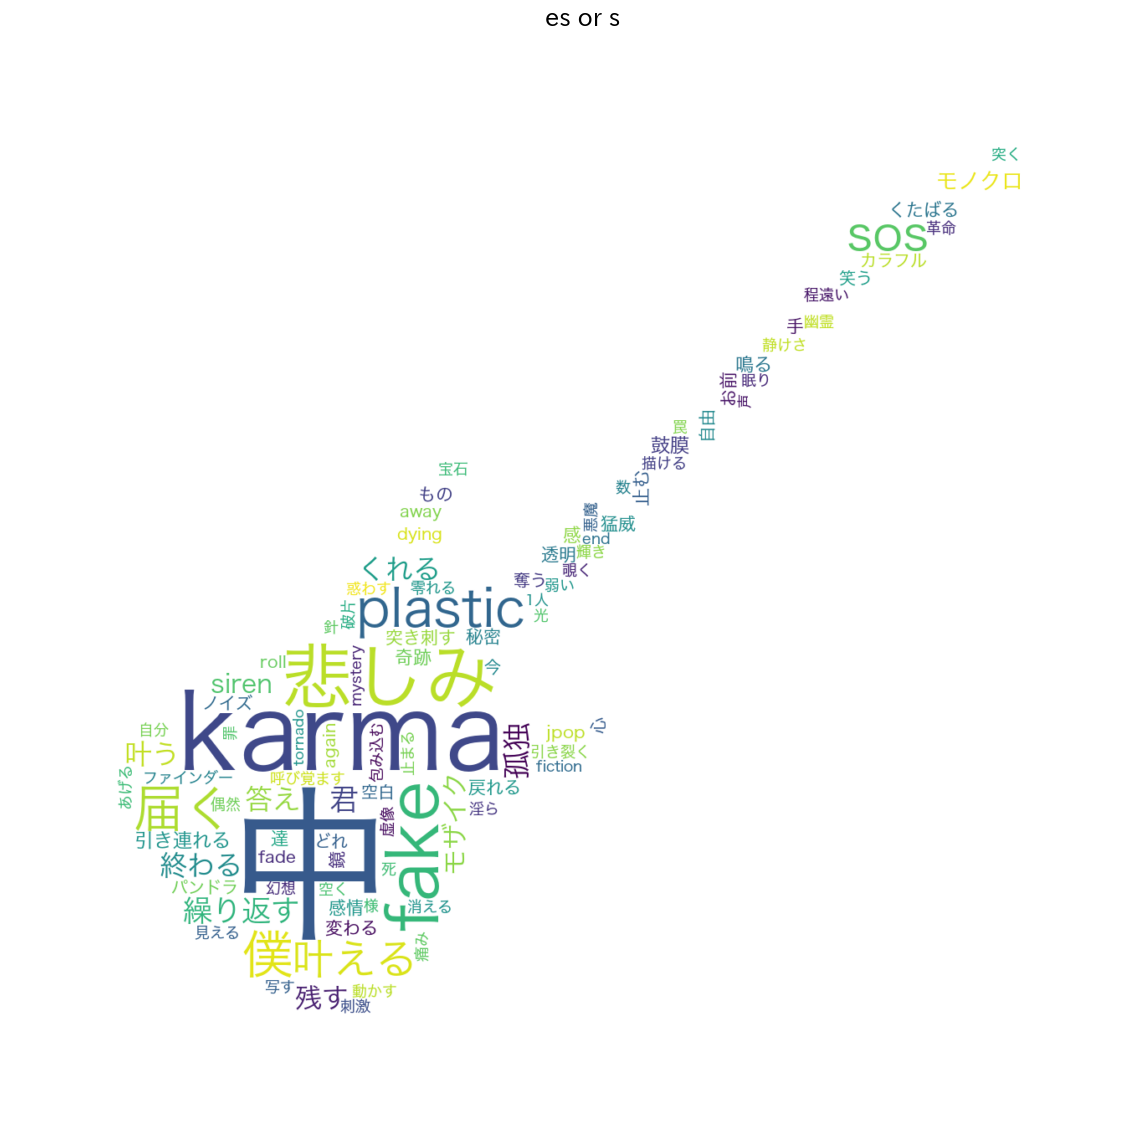

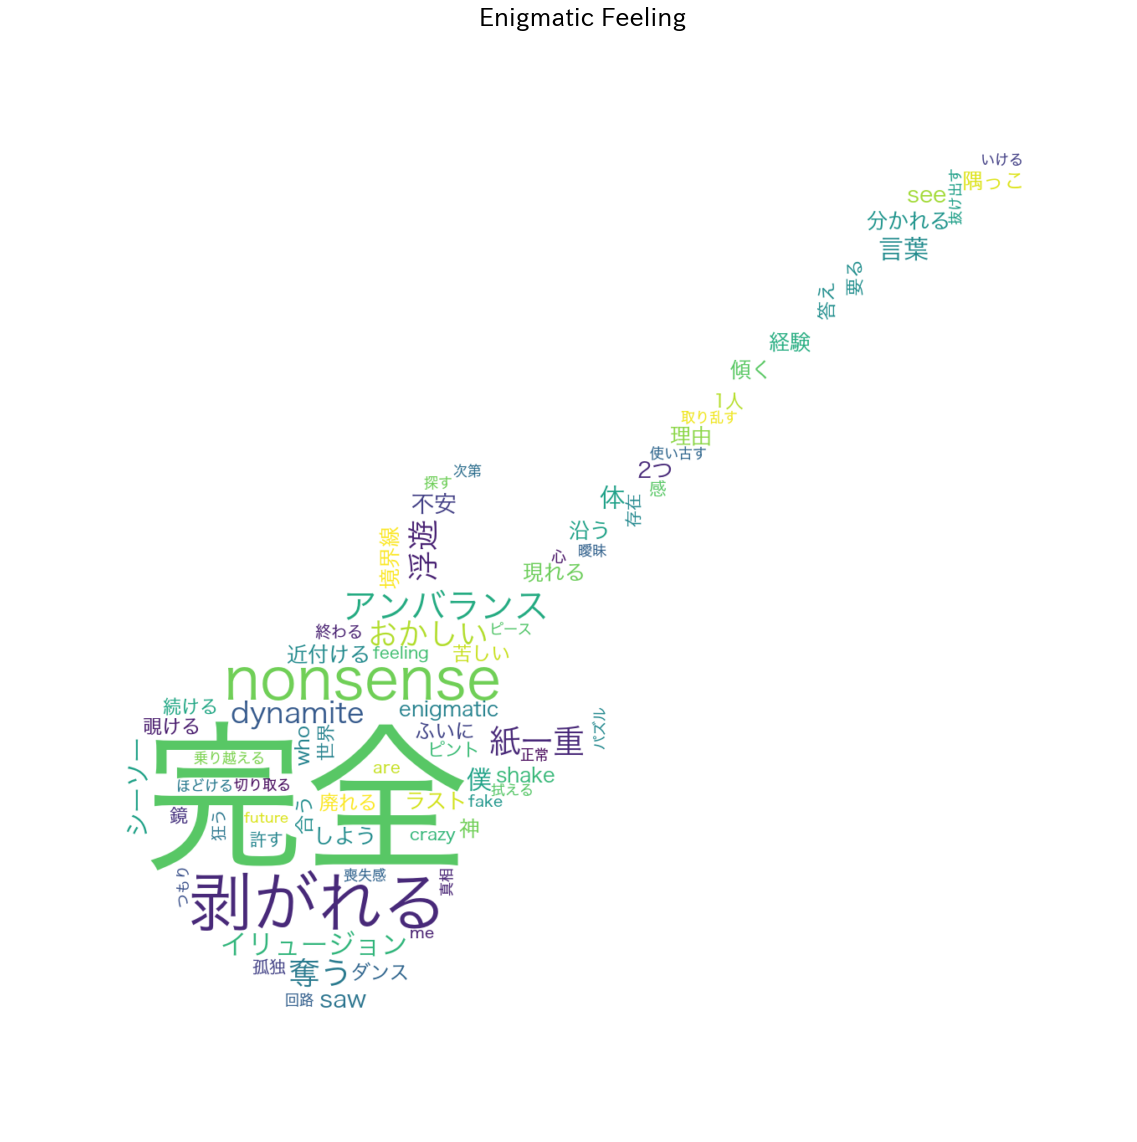

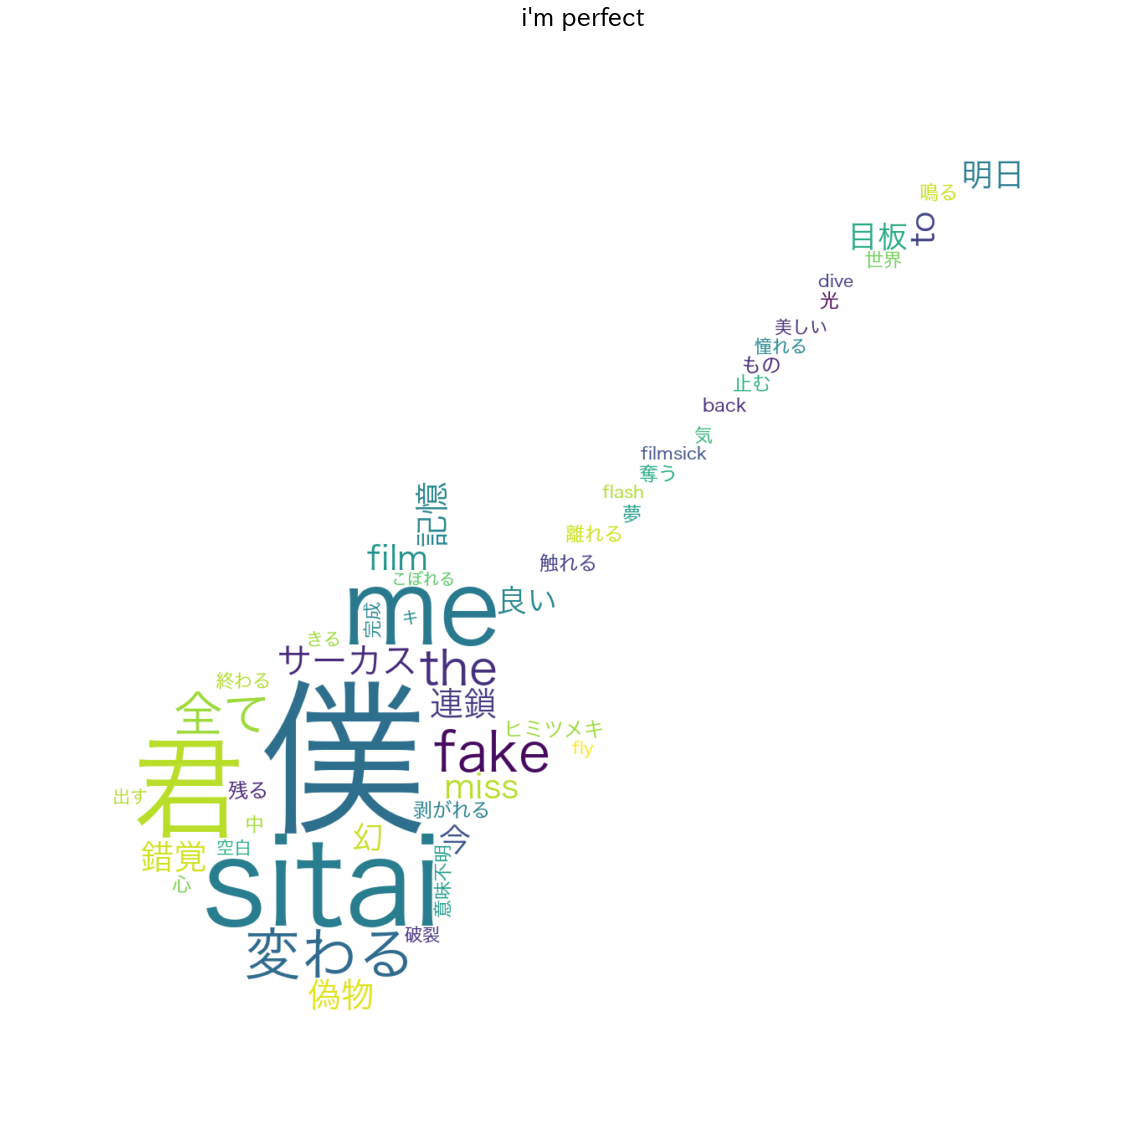

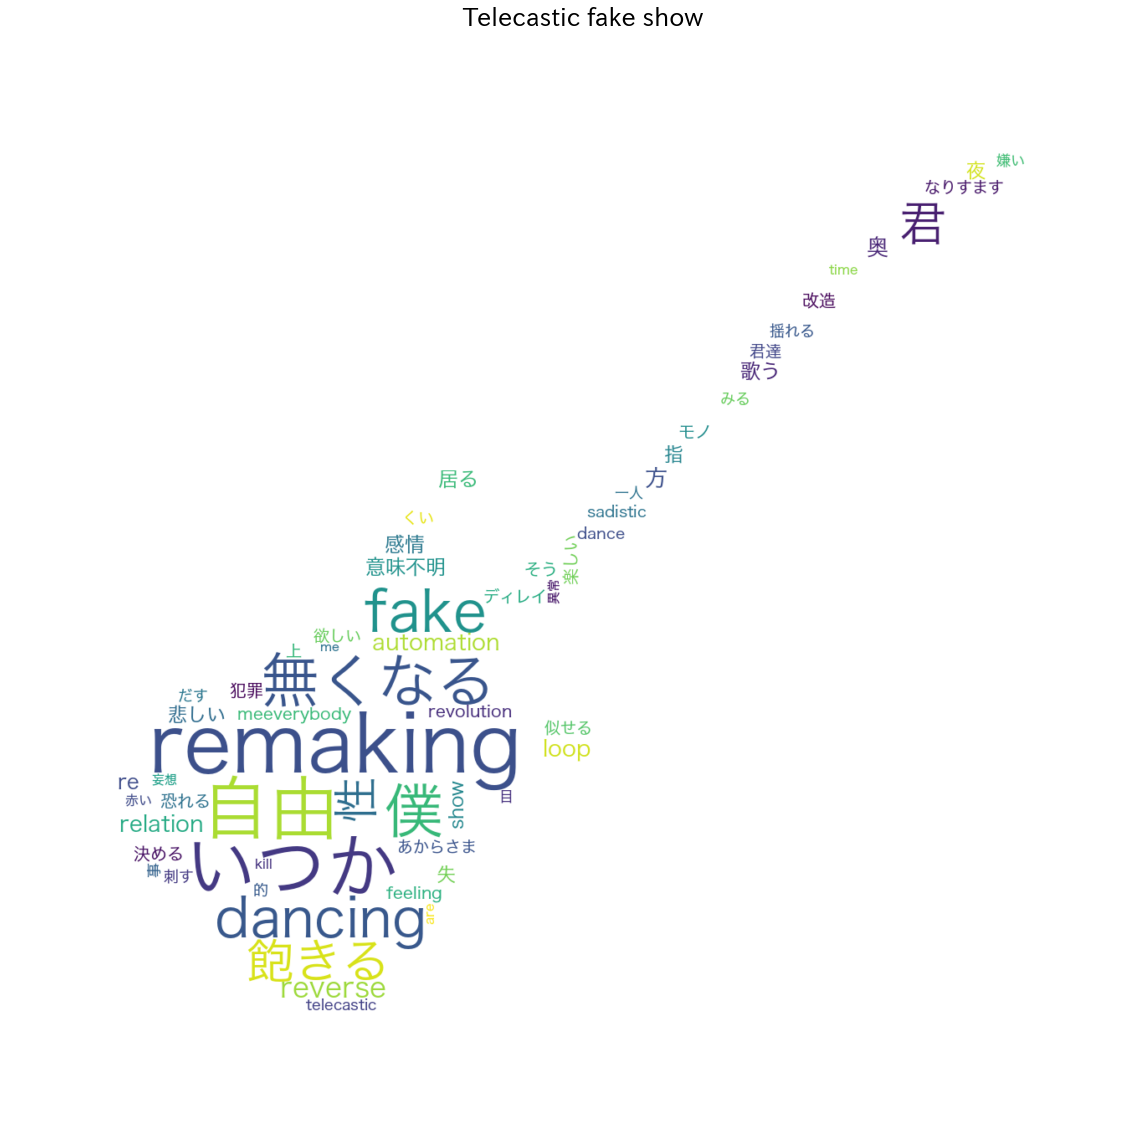

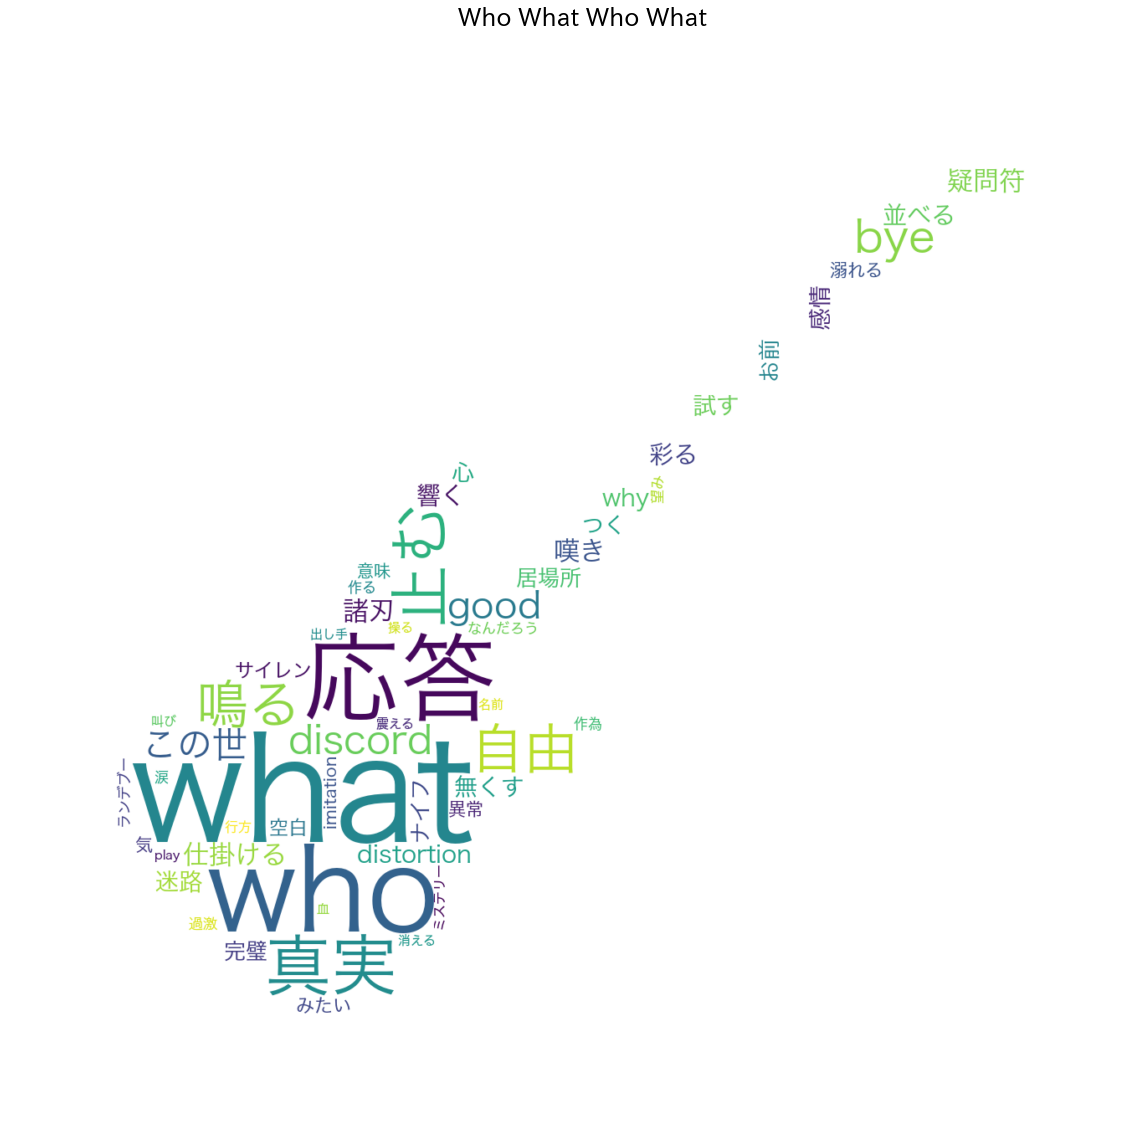

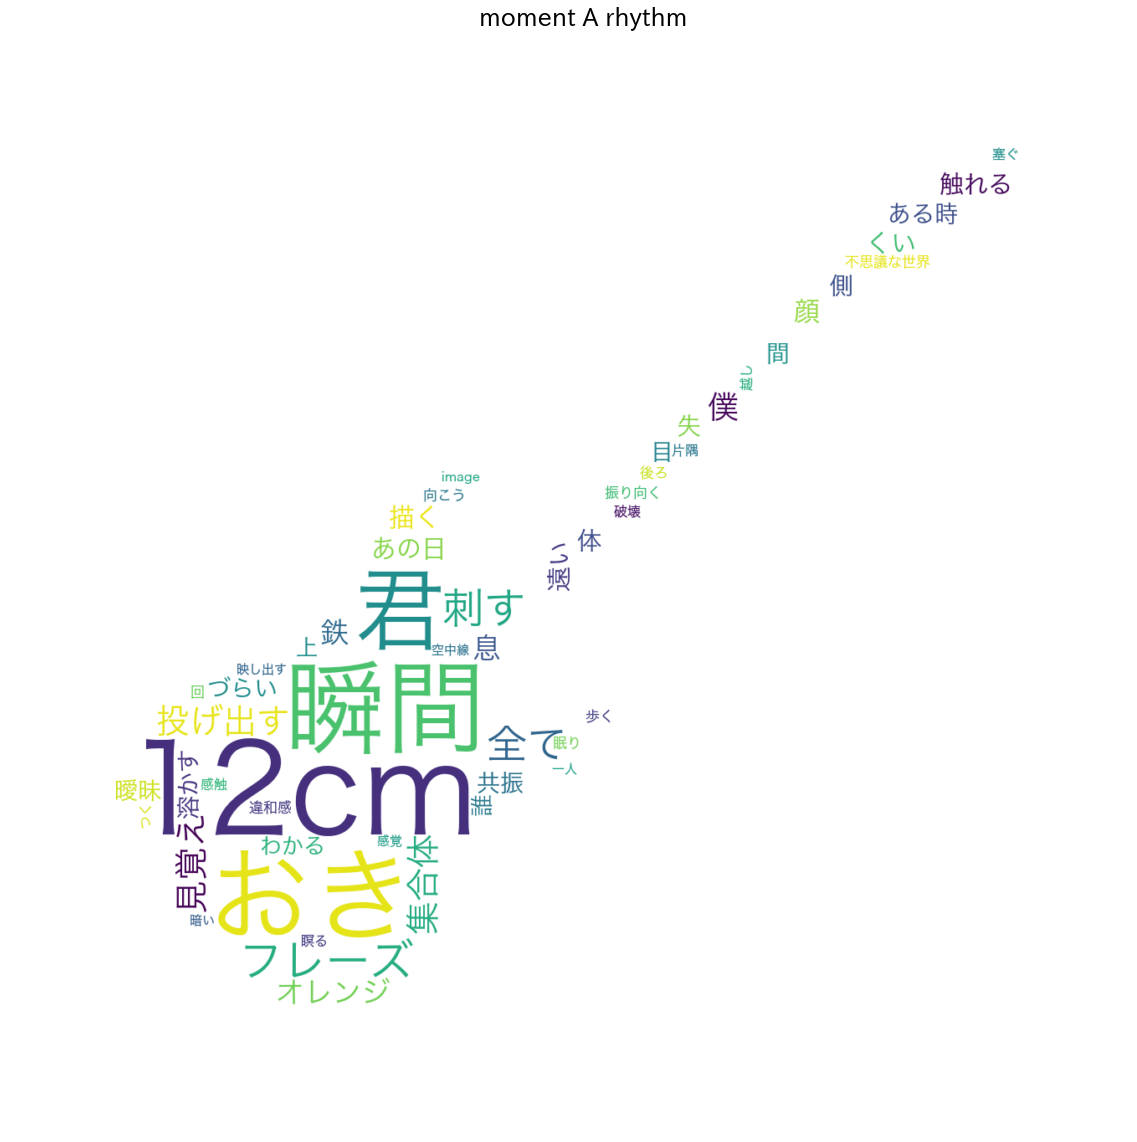

In [20]:
for i,album in enumerate(albums):
    fig_title = cd_num_name_dict[artist_df.CD_Number.unique().tolist()[i]]
    draw_wordcloud(album,'words','vector',fig_title,True, MASK_TELE, FONT)

# 全曲の歌詞でWordCloud

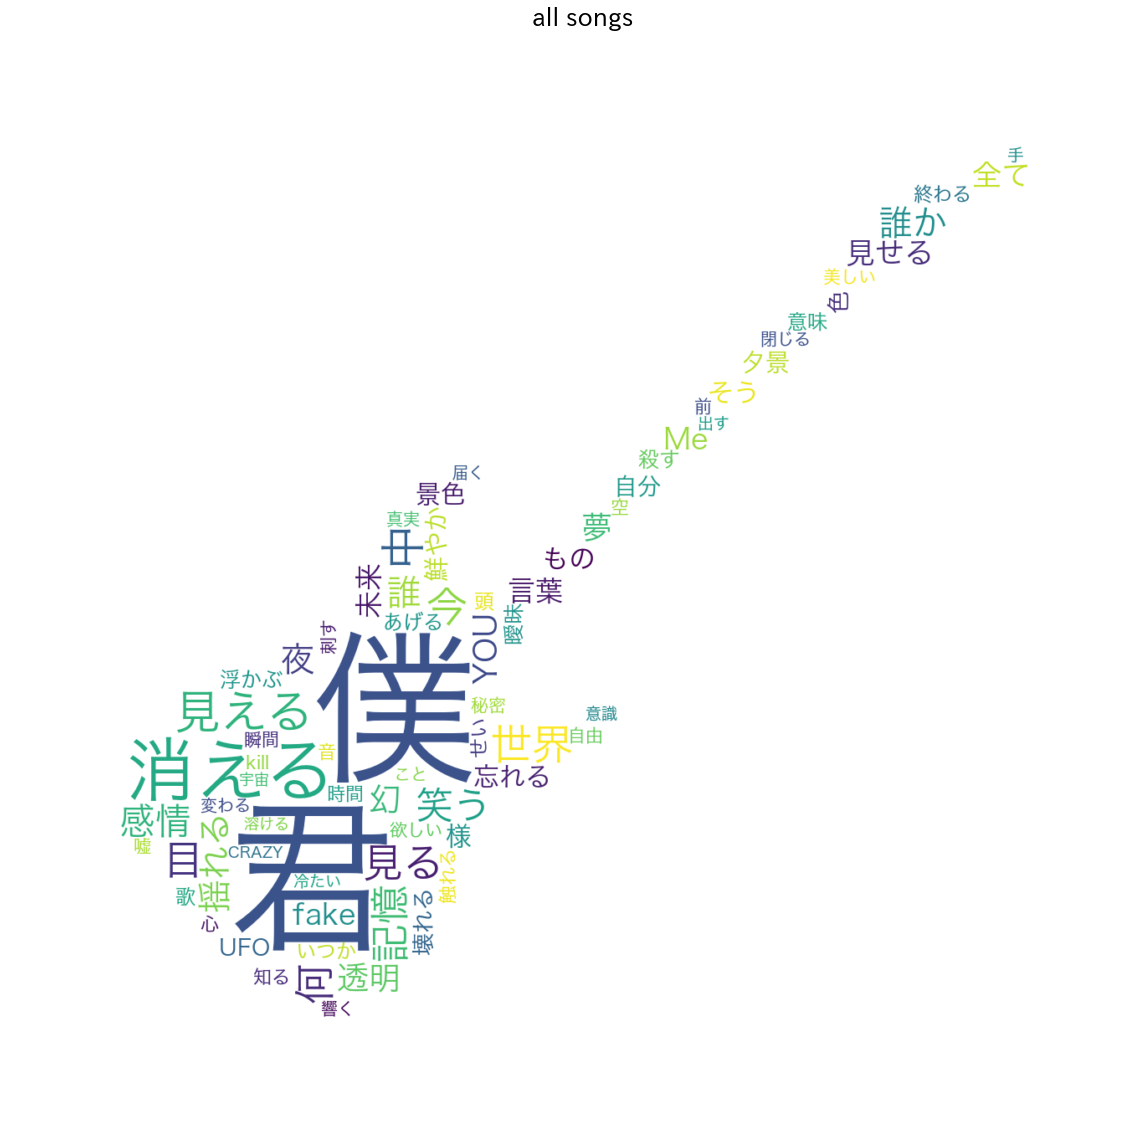

In [21]:
word_list = get_word_list(artist_df.Lyric.tolist(), NEOLOGD)                    
word_freq = pd.Series(word_list).value_counts() #pandasのSeriesに変換してvalue_counts()
words_df = pd.DataFrame({'noun' : word_freq.index,
             'noun_count' : word_freq.tolist()})
draw_wordcloud(words_df,'noun','noun_count','all songs',True, MASK_TELE, FONT)